# Lecture 06-28-2021

## Outline of Topics
1. Numpy arrays
2. The Pandas package
3. Tedious data wrangling and cleanup examples
 - Basic statistics for the example data sets
 - Least squares fitting of a straight line to data to estimate yield trend
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

Also see: <a href="https://docs.python.org/3/" target="_blank">Python 3.9.1 Documentation</a>

In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys  # The sys module provides functions, etc., allowing work with certain parts of the
            # runtime environment.


In [2]:
# Uses python's string format method.
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('Data')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/jvk/Documents/Teaching/2021-REEU/06-28-Mon
Current working directory: /Users/jvk/Documents/Teaching/2021-REEU/06-28-Mon/Data


If we wanted to move back to the original working directory we could execute the command `os.chdir('..')`

# More on the NumPy Package

All data manipulated by a computer is represented in binary. In otherwords, via one method or another, all data -- temperature sensor readings, hourly barometric pressure from your Davis weather station, an audio file, images from your Bushnell game camera, a yield map -- are represented as arrays of numbers.

**NumPy (Numerical Python)** provides an efficient interface to store and compute on dense data buffers. NumPy arrays are more efficient than Python's built-in list data type.

See: <a href="http://www.numpy.org" target="_blank">The Numpy Package</a>.

The command to import the numpy package and give it a nickname is
`import numpy as np`.

In [3]:
# Which version of numpy are we running ...
np.__version__

'1.15.2'

In [4]:
# Built in documentation ... type np.<tab> to see the name space.


In [5]:
# Documentation ...
np?

## C integers vs. Python integers

A C integer is essentially a label for a position in memory whose bytes encode an 
integer value.

A Python integer is a label for a position in memory containing a C structure that 
contains the Python object information including the bytes that encode the integer 
value.

In [6]:
# L is an integer. Let's see how many bytes it requires (a byte is 8 bits)
# sys.getsizeof() returns the number of bytes needed to encode 
# the object

L = 1
print(L)
print(type(L))
print('The number of bytes needed to store this variable is {}'.format(sys.getsizeof(L)))

1
<class 'int'>
The number of bytes needed to store this variable is 28


**For information** about the `sys` package see: <a href="https://docs.python.org/3/library/sys.html" target="_blank">System-specific parameters and functions</a>.

The size of a python integer is **not** strongly related to the size of the integer. This is an indication of the overhead associated with the representation. For example ...

In [7]:
print('Decimal Integer Hex Integer #Bytes Needed to Store')
print('_______________ ___________ ______________________')

for k in range(0,40):
    L = 2**k
    print('{:12d}    {:12s}       {}'.format(L, hex(L), sys.getsizeof(L)))

Decimal Integer Hex Integer #Bytes Needed to Store
_______________ ___________ ______________________
           1    0x1                28
           2    0x2                28
           4    0x4                28
           8    0x8                28
          16    0x10               28
          32    0x20               28
          64    0x40               28
         128    0x80               28
         256    0x100              28
         512    0x200              28
        1024    0x400              28
        2048    0x800              28
        4096    0x1000             28
        8192    0x2000             28
       16384    0x4000             28
       32768    0x8000             28
       65536    0x10000            28
      131072    0x20000            28
      262144    0x40000            28
      524288    0x80000            28
     1048576    0x100000           28
     2097152    0x200000           28
     4194304    0x400000           28
     8388608    0x800000

## How about string variables?

In [8]:
L = "1"
print(L)
print(type(L))
print('The number of bytes needed to store this variable is {}'.format(sys.getsizeof(L)))

1
<class 'str'>
The number of bytes needed to store this variable is 50


In [9]:
print('String         #Bytes Needed to Store')
print('______________ ______________________')

L = "1"
for k in range(0,20):
    print('{:20s}      {}'.format(L, sys.getsizeof(L)))
    L = L + '1'


String         #Bytes Needed to Store
______________ ______________________
1                         50
11                        51
111                       52
1111                      53
11111                     54
111111                    55
1111111                   56
11111111                  57
111111111                 58
1111111111                59
11111111111               60
111111111111              61
1111111111111             62
11111111111111            63
111111111111111           64
1111111111111111          65
11111111111111111         66
111111111111111111        67
1111111111111111111       68
11111111111111111111      69


## Now for Lists, Arrays, Numpy Arrays ...

In [10]:
L1 = list(range(20))
print(L1)
print(type(L1))
print(type(L1[0]))
print(sys.getsizeof(L1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
<class 'list'>
<class 'int'>
288


In [11]:
L2 = [str(c) for c in L1]
print(L2)
print(type(L2))
print(type(L2[0]))
print(sys.getsizeof(L2))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
<class 'list'>
<class 'str'>
264


In [12]:
# Comparing Python list and Python array

import array
L = list(range(100))
A = array.array('i',L)

print(A)
print(type(A))
print(type(A[0]))
print(sys.getsizeof(A))

print("\n")

print(L)
print(type(L))
print(type(L[0]))
print(sys.getsizeof(L))

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
<class 'array.array'>
<class 'int'>
464


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
<class 'list'>
<class 'int'>
1008


The python array is **more efficient for storage** than is the python list because overhead can be reduced given all the elements in the array are of the same type.

### Numpy array vs. array wrt storage ...

In [13]:
# The Python array object offers (more) efficient storage of array-based data than does 
# the list object. Numpy arrays also add efficient computations on that data.

ND = np.array(L) # np.array is used to create an ndarray from a Python list
print(ND)
print(type(ND))
print(sys.getsizeof(ND))
print("itemsize:", ND.itemsize, "bytes")
print("nbytes:", ND.nbytes, "bytes")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
<class 'numpy.ndarray'>
896
itemsize: 8 bytes
nbytes: 800 bytes


**Note** the numpy array at 896 bytes comes in between the list at 1008 bytes and the array at 464 bytes. Numpy gets its advantage from computation.

## Computation Comparisons ...

Make some arrays of reasonable length and then square the elements in each using `for` loops and comparing to numpy's built in `ufuncs`.

In [14]:
# Make a plain python array and then square the elements using a for loop ...
A = array.array('i', range(1000))

%timeit A2 = [A[k]**2 for k in range(1000)]

A2 = [A[k]**2 for k in range(1000)]

#print(A2)

1000 loops, best of 3: 435 µs per loop


In [15]:
# Make a numpy python array and then square the elements using a for loop ...
ND = np.array(range(1000))

%timeit ND2_v1 = [ND[k]**2 for k in range(1000)]

ND2_v1 = [ND[k]**2 for k in range(1000)]

#print(ND2_v1)

1000 loops, best of 3: 372 µs per loop


In [16]:
%timeit ND_v2 = np.multiply(ND,ND)

ND_v2 = np.multiply(ND,ND)

#print(ND_v2)

The slowest run took 42.83 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.1 µs per loop


### The squaring of the numpy array elements using the `ufunc` method is about 350 times faster than a `for` loop!

There is also a shorthand for numpy ufunc. For example:

`np.multiply(ND,ND) = ND**2 = ND*ND`

## Arrays and indexing
We are going to need to use some of python's array indexing and slicing capabilities below. Therefore, we introduce them here.

In [17]:
# Make an example one-dimensional array and fill it with random 
# integers. As used below the integers are between 0 and 9. The
# array size is 20. The first entry in the array is x[0] and the last
# is x[19]

x1 = np.random.randint(10, size=20)
print(x1)
print(x1[0])
print(x1[5])

[1 7 4 4 6 9 0 5 8 8 3 0 0 1 6 5 9 5 2 7]
1
9


In [18]:
# The "shape" method shows that x1 is a one-dimensional array of
# length 20
print(x1.shape)
print(len(x1))

(20,)
20


## Array slicing
This capability allows a simple way to access subarrays contained inside of an array. The notation uses the `:` operator. To access a slice of a **one-dimensional** array:

- x1[start:stop:step]

where

- start is the beginning index (default if unspecified: start = 0)
- stop is the ending index plus 1 (default if unspecified: stop = len(x1))
- step is the spacing (default if unspecified: step = 1)

In [19]:
x1

array([1, 7, 4, 4, 6, 9, 0, 5, 8, 8, 3, 0, 0, 1, 6, 5, 9, 5, 2, 7])

In [20]:
x1[1:11]

array([7, 4, 4, 6, 9, 0, 5, 8, 8, 3])

In [21]:
# Every other entry starting from second entry and ending by the
# 11th
x1[1:11:2]

array([7, 4, 9, 5, 8])

In [22]:
# Ditto but every third
x1[1:11:3]

array([7, 6, 5, 3])

In [23]:
# Starting from first entry
x1[:11]

array([1, 7, 4, 4, 6, 9, 0, 5, 8, 8, 3])

In [24]:
# Another way to get the entire array. Useful with multidimensional
# arrays
x1[:]

array([1, 7, 4, 4, 6, 9, 0, 5, 8, 8, 3, 0, 0, 1, 6, 5, 9, 5, 2, 7])

In [25]:
# Every other entry starting from first (i.e., even indices)
x1[::2]

array([1, 4, 6, 0, 8, 3, 0, 6, 9, 2])

In [26]:
# Every other entry starting from second (i.e., odd indices)
x1[1::2]

array([7, 4, 9, 5, 8, 0, 1, 5, 5, 7])

## Two-dimensional arrays

In [27]:
# Now generalize to matrix (a.k.a., a two-dimensional array).
x2 = np.random.randint(10, size=(10,10))
print(x2)

[[8 0 3 3 8 8 1 6 7 3]
 [2 4 0 5 7 1 2 0 2 9]
 [2 4 9 1 9 7 7 6 5 5]
 [7 6 3 5 5 1 9 8 3 5]
 [0 7 9 9 7 3 6 1 9 0]
 [1 3 9 7 3 0 1 5 6 2]
 [6 2 7 8 7 4 8 7 2 8]
 [8 7 4 7 7 4 8 6 9 4]
 [8 7 8 6 1 9 1 2 5 3]
 [9 2 4 9 5 8 8 1 0 9]]


In [28]:
# How to address an individual entry in x2 ...
x2[2,4]

9

In [29]:
# How to address the individual rows of x2 ...
x2[2,:]

array([2, 4, 9, 1, 9, 7, 7, 6, 5, 5])

In [30]:
# How to address the individual columns of x2
x2[:,1]

array([0, 4, 4, 6, 7, 3, 2, 7, 7, 2])

In [31]:
# How to extract a sub-array
x2[1:3,2:4]

array([[0, 5],
       [9, 1]])

In [32]:
# Just to see the original
x2

array([[8, 0, 3, 3, 8, 8, 1, 6, 7, 3],
       [2, 4, 0, 5, 7, 1, 2, 0, 2, 9],
       [2, 4, 9, 1, 9, 7, 7, 6, 5, 5],
       [7, 6, 3, 5, 5, 1, 9, 8, 3, 5],
       [0, 7, 9, 9, 7, 3, 6, 1, 9, 0],
       [1, 3, 9, 7, 3, 0, 1, 5, 6, 2],
       [6, 2, 7, 8, 7, 4, 8, 7, 2, 8],
       [8, 7, 4, 7, 7, 4, 8, 6, 9, 4],
       [8, 7, 8, 6, 1, 9, 1, 2, 5, 3],
       [9, 2, 4, 9, 5, 8, 8, 1, 0, 9]])

In [33]:
# Subarray with every other row and column (even) 
x2[::2,::2]

array([[8, 3, 8, 1, 7],
       [2, 9, 9, 7, 5],
       [0, 9, 7, 6, 9],
       [6, 7, 7, 8, 2],
       [8, 8, 1, 1, 5]])

In [34]:
# Subarray with every other row and column (odd)
x2[1::2,1::2]

array([[4, 5, 1, 0, 9],
       [6, 5, 1, 8, 5],
       [3, 7, 0, 5, 2],
       [7, 7, 4, 6, 4],
       [2, 9, 8, 1, 9]])

### Even and Odd Subarrays ...
Each time we only get a fourth of the elements in the original. How would you index to get the rest of them?

<img align="left" src='Data/SubarrayFig.png' width="600"/>

Take a break here ...

# Explore the Wheat Yield Data and Clean It Up

In [35]:
my_file_name = 'Wrangled-WheatYields.csv'
my_file_name

'Wrangled-WheatYields.csv'

In [36]:
# Open the wrangled file for reading only and print the first few 
# lines.

fin = open(my_file_name, "r")

for i in range(10):
    line = fin.readline()
    print(line, end='')

fin.close()

"Year","State","State ANSI","County","County ANSI","Value"
"2007","CALIFORNIA","06","CONTRA COSTA","013","35"
"2007","CALIFORNIA","06","MONTEREY","053","60"
"2007","CALIFORNIA","06","SAN LUIS OBISPO","079","48"
"2007","CALIFORNIA","06","LASSEN","035","0"
"2007","CALIFORNIA","06","MODOC","049","0"
"2007","CALIFORNIA","06","BUTTE","007","51.7"
"2007","CALIFORNIA","06","COLUSA","011","57.7"
"2007","CALIFORNIA","06","GLENN","021","68.1"
"2007","CALIFORNIA","06","SACRAMENTO","067","66.7"


## Missing Entries in Wrangled-WheatYields

Previously we found that there were a total of 972 state-county pairs and 79 years represented in the data set. Therefore, if the data set was complete there should be 972*79 = 76,788 lines in the file. But there are only 34,116 lines and therefore there are many missing entries. One of the first things of interest would be to create a table showing the 972 state-county pairs as rows and the 79 possible years as columns with entries being 1 if data is present and 0 otherwise. This allows us to quickly identify state-county pairs with relatively little data.

In [37]:
# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# Initialize some empty sets.
years = set()
state_county_pairs = set()

# The year values are located in the first column (index = 0)
# The state values are in the second column (index = 1)
# The county values are in the fourth column (index = 3)
for line in fin:
    fields = line.split(',')
    yr = fields[0].replace('"', '')
    years.add(yr)
    s = fields[1].replace('"', '')
    c = fields[3].replace('"', '')
    state_county_pairs.add(s + '-' + c)
                      
fin.close()

## Unique years, unique state_county_pairs
The set variable `years` will contain the unique years for which we have data. Similarly the set variable `state_county_pairs` contains the unique locations for which we have data.

In [38]:
print('The number of unique years is {:2d}.'.format(len(years)))
print('The set of years is \n {}.'.format(years))

The number of unique years is 79.
The set of years is 
 {'1959', '1968', '1978', '1939', '1995', '1971', '1941', '1938', '1937', '1996', '1980', '1933', '1960', '1967', '1958', '1953', '1951', '1969', '1976', '1945', '2000', '1932', '1955', '1975', '1970', '1994', '1930', '1986', '2003', '1964', '2002', '1961', '1942', '1952', '2004', '1934', '1992', '1993', '1990', '1962', '1979', '1954', '2001', '1949', '1948', '1999', '1947', '1946', '1973', '1935', '1972', '1963', '1988', '1956', '1966', '1998', '1950', '1991', '1997', '1974', '1943', '1989', '1940', '1965', '1985', '2005', '1936', '2007', '1987', '1982', '2006', '1929', '1981', '1984', '1977', '1957', '1944', '1983', '1931'}.


In [39]:
print('The number of unique state-county pairs is {:2d}.'.format(len(state_county_pairs)))
print('The set of state-county pairs is \n {}.'.format(state_county_pairs))

The number of unique state-county pairs is 972.
The set of state-county pairs is 
 {'TEXAS-FLOYD', 'NORTH DAKOTA-BURLEIGH', 'NORTH DAKOTA-WARD', 'COLORADO-YUMA', 'OKLAHOMA-BRYAN', 'TEXAS-SWISHER', 'SOUTH DAKOTA-BUTTE', 'TEXAS-DEAF SMITH', 'SOUTH DAKOTA-MINER', 'IDAHO-CANYON', 'WYOMING-CROOK', 'KANSAS-DOUGLAS', 'NEW MEXICO-SAN MIGUEL', 'NEBRASKA-MORRILL', 'MONTANA-FALLON', 'TEXAS-CHEROKEE', 'WYOMING-NATRONA', 'KANSAS-WYANDOTTE', 'NEW MEXICO-UNION', 'TEXAS-BORDEN', 'MONTANA-BEAVERHEAD', 'IDAHO-IDAHO', 'TEXAS-FISHER', 'NEW MEXICO-CIBOLA', 'KANSAS-HAMILTON', 'NEW MEXICO-SOCORRO', 'TEXAS-MOTLEY', 'SOUTH DAKOTA-JONES', 'SOUTH DAKOTA-BROWN', 'COLORADO-ARAPAHOE', 'SOUTH DAKOTA-HANSON', 'KANSAS-RICE', 'NEBRASKA-SEWARD', 'SOUTH DAKOTA-HAND', 'SOUTH DAKOTA-AURORA', 'COLORADO-HINSDALE', 'NEBRASKA-SCOTTS BLUFF', 'MONTANA-PHILLIPS', 'NORTH DAKOTA-OLIVER', 'TEXAS-GLASSCOCK', 'OKLAHOMA-CHOCTAW', 'NEBRASKA-DODGE', 'OREGON-WALLOWA', 'UTAH-GRAND', 'OKLAHOMA-MARSHALL', 'TEXAS-PANOLA', 'NEW MEXICO-TAOS', '

## Converting Sets to Lists
We originally used sets to hold the `years` and `state_county_pairs` data in order to impose uniqueness since sets never have duplicate elements. Therefore, when we were originally reading the data if the same year or same state-county pair was read multiple times (and they were), then we would automatically avoid adding duplicates.

Finally, we convert the sets to lists in order to sort them. We particularly want the `years` variable ordered numerically increasing.

In [40]:
# Check the types of years and state_county_pairs
print(type(years))
print(type(state_county_pairs))

# Convert them to lists
years = list(years)
state_county_pairs = list(state_county_pairs)

# Check the types of years and state_county_pairs
print(type(years))
print(type(state_county_pairs))

<class 'set'>
<class 'set'>
<class 'list'>
<class 'list'>


## The `isdata` array
We will create a numpy array that contains the information about whether a particular (state_county_pair, year) has data in our file. The array will have rows indexed by state_county_pair and columns indexed by year.

While we are at it we might as well define an array `ydata` to contain the yield data. We initialize with minus one (-1) --- for simplicity. Then missing yield data will not be mistaken for yield data equal to zero. 

<img align="left" src='Data/isdata-figure.png' width="400"/>

In [56]:
# The variable "isdata" is initialized with zeros. When a one appears
# at a particular row and column it indicates that the corresponding
# state-county pair and year has yield data.
isdata = np.zeros((len(state_county_pairs), len(years)))
print(type(isdata))
print(isdata.shape)

<class 'numpy.ndarray'>
(972, 79)


In [57]:
# The variable "ydata" is also initialized with zeros.
#ydata = np.zeros((len(state_county_pairs), len(years)))
ydata = -np.ones((len(state_county_pairs), len(years)))
print(type(ydata))
print(ydata.shape)

<class 'numpy.ndarray'>
(972, 79)


In [58]:
# Notice how the "years" data are not ordered in any particular way
print(years)

['1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007']


In [59]:
# Ditto for "state_county_pairs" ...
print(state_county_pairs)

['CALIFORNIA-ALAMEDA', 'CALIFORNIA-AMADOR', 'CALIFORNIA-BUTTE', 'CALIFORNIA-COLUSA', 'CALIFORNIA-CONTRA COSTA', 'CALIFORNIA-FRESNO', 'CALIFORNIA-GLENN', 'CALIFORNIA-HUMBOLDT', 'CALIFORNIA-IMPERIAL', 'CALIFORNIA-KERN', 'CALIFORNIA-KINGS', 'CALIFORNIA-LAKE', 'CALIFORNIA-LASSEN', 'CALIFORNIA-LOS ANGELES', 'CALIFORNIA-MADERA', 'CALIFORNIA-MARIN', 'CALIFORNIA-MARIPOSA', 'CALIFORNIA-MENDOCINO', 'CALIFORNIA-MERCED', 'CALIFORNIA-MODOC', 'CALIFORNIA-MONO', 'CALIFORNIA-MONTEREY', 'CALIFORNIA-NAPA', 'CALIFORNIA-ORANGE', 'CALIFORNIA-PLACER', 'CALIFORNIA-PLUMAS', 'CALIFORNIA-RIVERSIDE', 'CALIFORNIA-SACRAMENTO', 'CALIFORNIA-SAN BENITO', 'CALIFORNIA-SAN BERNARDINO', 'CALIFORNIA-SAN DIEGO', 'CALIFORNIA-SAN JOAQUIN', 'CALIFORNIA-SAN LUIS OBISPO', 'CALIFORNIA-SAN MATEO', 'CALIFORNIA-SANTA BARBARA', 'CALIFORNIA-SANTA CLARA', 'CALIFORNIA-SHASTA', 'CALIFORNIA-SIERRA', 'CALIFORNIA-SISKIYOU', 'CALIFORNIA-SOLANO', 'CALIFORNIA-SONOMA', 'CALIFORNIA-STANISLAUS', 'CALIFORNIA-SUTTER', 'CALIFORNIA-TEHAMA', 'CALIFOR

In [60]:
# Sort the years and state_county_pairs lists. This is done so that we
# can refer to the data in the numpy array and have the order there
# correspond to the state-county pair and year of interest.
years.sort()
state_county_pairs.sort()

In [61]:
# Print just to see what the ordering looks like
print(years)

['1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007']


In [62]:
# Print to see the ordering
print(state_county_pairs)

['CALIFORNIA-ALAMEDA', 'CALIFORNIA-AMADOR', 'CALIFORNIA-BUTTE', 'CALIFORNIA-COLUSA', 'CALIFORNIA-CONTRA COSTA', 'CALIFORNIA-FRESNO', 'CALIFORNIA-GLENN', 'CALIFORNIA-HUMBOLDT', 'CALIFORNIA-IMPERIAL', 'CALIFORNIA-KERN', 'CALIFORNIA-KINGS', 'CALIFORNIA-LAKE', 'CALIFORNIA-LASSEN', 'CALIFORNIA-LOS ANGELES', 'CALIFORNIA-MADERA', 'CALIFORNIA-MARIN', 'CALIFORNIA-MARIPOSA', 'CALIFORNIA-MENDOCINO', 'CALIFORNIA-MERCED', 'CALIFORNIA-MODOC', 'CALIFORNIA-MONO', 'CALIFORNIA-MONTEREY', 'CALIFORNIA-NAPA', 'CALIFORNIA-ORANGE', 'CALIFORNIA-PLACER', 'CALIFORNIA-PLUMAS', 'CALIFORNIA-RIVERSIDE', 'CALIFORNIA-SACRAMENTO', 'CALIFORNIA-SAN BENITO', 'CALIFORNIA-SAN BERNARDINO', 'CALIFORNIA-SAN DIEGO', 'CALIFORNIA-SAN JOAQUIN', 'CALIFORNIA-SAN LUIS OBISPO', 'CALIFORNIA-SAN MATEO', 'CALIFORNIA-SANTA BARBARA', 'CALIFORNIA-SANTA CLARA', 'CALIFORNIA-SHASTA', 'CALIFORNIA-SIERRA', 'CALIFORNIA-SISKIYOU', 'CALIFORNIA-SOLANO', 'CALIFORNIA-SONOMA', 'CALIFORNIA-STANISLAUS', 'CALIFORNIA-SUTTER', 'CALIFORNIA-TEHAMA', 'CALIFOR

## Populating data into `isdata` and `ydata`
The next cell reads data from the `Wrangled-WheatYields.csv` file and populates the numpy arrays `isdata` and `ydata`. Remember these two arrays were initialized as all zeros.

Below we will use the `index()` method, which returns the numeric index of the first occurrence of an item in a list. We made our `state_county_pairs` and `years` lists to have unique items.

In [63]:
# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# The year values are located in the first column (index = 0)
# The state values in the second column (index = 1). County
# values in the fourth column (index = 3). County average yield
# values in the sixth column (index = 5).
#
# Note how we use the python method .index in order to properly
# align the data values in the numpy arrays with the list values
# in years and state_county_pairs.

for line in fin:
    fields = line.split(',') #Separate line into individual items
    yr = fields[0].replace('"', '') #Delete extra double quotes
    s = fields[1].replace('"', '') #Delete extra double quotes
    c = fields[3].replace('"', '') #Delete extra double quotes
    s_c = s + '-' + c
    rindex = state_county_pairs.index(s_c)
    cindex = years.index(yr)
    isdata[rindex, cindex] = 1 #Insert "1" into isdata in proper place
    yd = fields[5]
    yd = yd.replace('\n', '') #Delete newline character at the end
    yd = yd.replace('"', '') #Delete extra double quotes
    ydata[rindex, cindex] = float(yd) #Insert a numeric yield value in the proper place
                      
fin.close()

In [64]:
# Just to look at the array
print(ydata)

[[-1.  -1.  -1.  ... -1.  -1.  -1. ]
 [-1.  -1.  -1.  ... -1.  -1.  -1. ]
 [-1.  -1.  -1.  ...  0.  56.7 51.7]
 ...
 [-1.  -1.  -1.  ... -1.  -1.  -1. ]
 [-1.  -1.  -1.  ... -1.  -1.  -1. ]
 [-1.  -1.  -1.  ... -1.  -1.  -1. ]]


In [65]:
# Just to look at the array
print(isdata)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Let's try to plot the numpy array `isdata` as an image to visualize the available yield data.

See: <a href="https://matplotlib.org" target="_blank">Matplotlib web page</a>

For using `matplotlib.pyplot.contour`, `--.contourf`, and `numpy.meshgrid` see:

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html" target="_blank">Contour Plots</a>

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf" target="_blank">Filled Contour Plots</a>

<a href="https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html#numpy.meshgrid" target="_blank">Meshgrid</a>

Matplotlib Tutorials: <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">Colormaps</a>

In [66]:
# Preparing a meshgrid for contour plots ...
iyrs = range(len(isdata[0,:]))
iscprs = range(len(isdata[:,0]))
IYRS, ISCPRS = np.meshgrid(iyrs,iscprs)

# Defining a function to evaluate values from isdata
def ID(x,y):
    return isdata[x,y]

# Evaluate on the mesh
Z = ID(ISCPRS,IYRS)

Text(0.5, 1.0, 'Data Available (green = have data, blue = no data)')

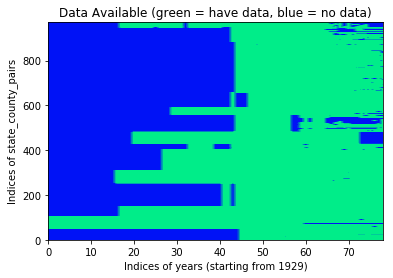

In [67]:
# Make filled contour plot and label axes, etc. ...
plt.contourf(IYRS,ISCPRS,Z, cmap='winter');
plt.ylabel('Indices of state_county_pairs')
plt.xlabel('Indices of years (starting from 1929)')
plt.title('Data Available (green = have data, blue = no data)')

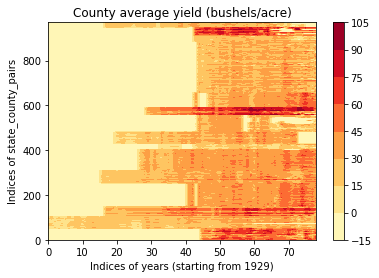

In [68]:
# Repeat only for the actual county average yield values
def Y(x,y):
    return ydata[x,y]
Z = Y(ISCPRS,IYRS)

plt.contourf(IYRS,ISCPRS,Z, cmap='YlOrRd');
plt.ylabel('Indices of state_county_pairs')
plt.xlabel('Indices of years (starting from 1929)')
plt.title('County average yield (bushels/acre)')
plt.colorbar()

### Another useful image style plotting command:

`plt.imshow`

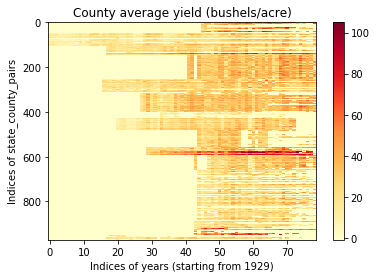

In [69]:
# Example of using the imshow version
dataplot = plt.imshow(ydata, aspect='auto', cmap='YlOrRd')
plt.ylabel('Indices of state_county_pairs')
plt.xlabel('Indices of years (starting from 1929)')
plt.title('County average yield (bushels/acre)')
plt.colorbar()

### Compute the fraction of complete data in this data set ...

In [70]:
frac = (len(isdata[0,:])*len(isdata[:,0]) - sum(sum(isdata)))/(len(isdata[0,:])*len(isdata[:,0]))

print('Fraction of unavailable data is {:.2f}'.format(frac))

Fraction of unavailable data is 0.56


## Missing data
- The above plots show how much data is missing. 
- There also appears to be a trend of increasing yield over time, but it is clearly only a very slight positive increase. 
- There is no apparent trend or pattern associated with the state_county_pairs but this is not surprising since there is no particular geographical association with the ordering.

## To summarize: 
We've created a numpy array `isdata` of size 972 x 79 where the rows correspond to state-county pairs and the columns correspond to years. The values contained in the array are either 0 or 1. 
A "1" at a particular entry in `isdata` corresponding to (row, column) equal to ...

(state-county, year)

indicates that we have recorded data for the county average wheat yield in that year.

We also created a 972 x 79 array `ydata` which contained the actual yield data if it was available and -1 if not.

By various means (plots, printing parts of the array) we see that there is a lot of missing data. We can perform various operations to determine how much complete data can be found.

## Of interest would be the answers to the following two questions:

1. What is the maximum subset of years for which all the state-county pairs have data?

2. What is the maximum subset of state-county pairs for which all the years have data?

A particular row has "1" in locations where data is present for a particular year. Thus, if we multiply two rows elementwise then the "1s" in the product vector indicate the years for which both state-county pairs have data. The product of all of the rows in the `isdata` matrix would contain the answer to the first question.

A similar observation applies to the elementwise product of columns in the `isdata` matrix.

<img align="left" src='Data/isdata-computation.png' width="600"/>

## Implementing the rows multiplication ...

Elementwise multiplication of arrays ...

<img align="left" src='Data/ArrayElementWiseMult.png' width="400"/>

In [71]:
# Initialize a vector to hold info about which years contain
# data for every state-county pair. Then sequentially multiply all
# of the rows together.
#
# Note that we python multiplies arrays we automatically get 
# "elementwise" multiplication. It's not the same as the matrix
# vector multiplication that happens in linear algebra or in matlab.

all = np.ones(len(years))

for i in range(len(state_county_pairs)):
    all = all*isdata[i,:]

In [72]:
# Look at the result
print(all)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


## Result of multiplying all rows of `isdata` ...
There are no "1s" in the vector and thus **no years** for which all state-county pairs have data ...

## Implementing the columns multiplication ...

In [73]:
# Initialize a vector to hold info about which state-county pairs contain
# data for every year. Then sequentially multiply all
# of the columns together.
all = np.ones(len(state_county_pairs))

for i in range(len(years)):
    all = all*isdata[:,i]

In [74]:
# Look at the result
print(all)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [75]:
# Clearly some state-county pairs have data for all years. How many?
all.sum()

13.0

## Result of multiplying all rows of `isdata` ...
According to this test there are 13 state-county pairs which have data in all 79 years. Which state-county pairs are they?

In [76]:
scpairs = []
i = 0
for sc in state_county_pairs:
    if all[i] > 0:
        scpairs.append(sc)
    i = i + 1

In [77]:
print(scpairs)

['COLORADO-ADAMS', 'COLORADO-BENT', 'COLORADO-ELBERT', 'COLORADO-KIT CARSON', 'COLORADO-LA PLATA', 'COLORADO-LARIMER', 'COLORADO-MOFFAT', 'COLORADO-MONTEZUMA', 'COLORADO-ROUTT', 'COLORADO-SEDGWICK', 'COLORADO-WASHINGTON', 'COLORADO-WELD', 'COLORADO-YUMA']


## Only a few Colorado counties have complete data ...
Certainly the above is not enough data to discern interesting trends, etc. We, therefore, need to restrict to some state-county pairs of real interest if we hope to find data worth comparing and trends worth following.

Restrict attention to the map area shown below. These counties are of particular interest in dryland wheat production and stretch from west to east approximately 400 miles. Rerun the calculation of years for which we have common data.

<img src='Data/Counties.png'>

In [78]:
# Here I am manually setting the state_county pairs of interest 
# according to the figure above

JVK_sc_pairs = ['COLORADO-WASHINGTON',
 'COLORADO-SEDGWICK',
 'COLORADO-PHILLIPS',
 'COLORADO-YUMA',
 'NEBRASKA-DUNDY',
 'NEBRASKA-HITCHCOCK',
 'NEBRASKA-RED WILLOW',
 'NEBRASKA-FURNAS',
 'NEBRASKA-HARLAN',
 'NEBRASKA-FRANKLIN',
 'NEBRASKA-WEBSTER',
 'NEBRASKA-NUCKOLLS',
 'NEBRASKA-THAYER',
 'NEBRASKA-JEFFERSON',
 'NEBRASKA-GAGE',
 'NEBRASKA-PAWNEE',
 'KANSAS-CHEYENNE',
 'KANSAS-RAWLINS',
 'KANSAS-DECATUR',
 'KANSAS-NORTON',
 'KANSAS-PHILLIPS',
 'KANSAS-SMITH',
 'KANSAS-JEWELL',
 'KANSAS-REPUBLIC',
 'KANSAS-WASHINGTON',
 'KANSAS-MARSHALL',
 'KANSAS-NEMAHA',
 'KANSAS-BROWN']

## Getting the data for the restricted state_county pairs set ...
In the code block below we want to create a list containing the indices from the entire collection of state_county_pairs which correspond to the above restricted set of state_county_pairs

In [79]:
rindex = []
for sc in state_county_pairs:
    if sc in JVK_sc_pairs:
        rindex.append(state_county_pairs.index(sc))

In [80]:
# Note that the complete collection of state_county_pairs indices
# would run from 0 to 971
print(rindex)

[92, 100, 103, 105, 155, 160, 168, 193, 206, 214, 217, 222, 225, 227, 240, 249, 338, 340, 342, 343, 351, 353, 357, 374, 376, 382, 394, 400]


In [81]:
# For this restricted set of state_county pairs, find which 
# years have data ...
all = np.ones(len(years))

for i in rindex:
    all = all*isdata[i,:]

In [82]:
print(all)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1.]


In [83]:
# Find the corresponding years
yrs = []
i = 0
for y in years:
    if all[i] > 0:
        yrs.append(y)
    i = i + 1

In [84]:
print(yrs)

['1970', '1971', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2003', '2004', '2005', '2006', '2007']


Now we could plot a time series of county averages for this set of state-county pairs and this set of years just to see the trends. Note that there are still two missing years (1972 and 2002) but we will ignore that ...

In [85]:
# This creates the column index set corresponding to the years 
# for which data is available
cindex = []
for y in years:
    if y in yrs:
        cindex.append(years.index(y))

In [86]:
# Note that the complete collection of years indices
# would run from 0 to 78
print(cindex)

[41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78]


In [87]:
# Print the number of state_county pairs in the restricted
# group ...
len(rindex)

28

In [88]:
# Print the number of years in the group of years where all
# state_county pairs in the restricted set have data
len(cindex)

36

## Select a smaller array with continguous data ...
Out of the large array of size 972 x 79 containing county average yield data over various years we want to extract the smaller 28 x 36 array containing county average yield data for our selected state, county pairs of interest and our selected years of interest.

In [89]:
# We have to do this in two steps. First we select the 28 rows 
# corresponding to the counties of interest
select_ydata_temp = ydata[rindex,:]

# Then from that we select the 36 years desired
select_ydata = select_ydata_temp[:,cindex]

In [90]:
select_ydata.shape

(28, 36)

In [91]:
print(select_ydata)

[[38.  36.  33.9 ... 24.  18.5 42.5]
 [38.5 41.5 36.  ... 24.  21.  39. ]
 [30.  29.  24.  ... 21.5 19.5 37. ]
 ...
 [39.9 46.9 38.8 ... 46.  42.  54. ]
 [39.4 42.8 40.6 ... 43.  39.  36. ]
 [42.7 47.  45.2 ... 42.  34.  36. ]]


Plot the individual county average yields on the same axis.

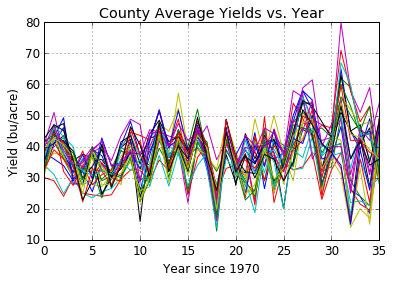

In [92]:
fig = plt.figure()
plt.style.use('classic')

for k in range(select_ydata.shape[0]):
    plt.plot(select_ydata[k,:])
    
plt.title("County Average Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()

fig.savefig('FirstPlot.png')

There is a lot of variability both spatially and temporally. Let's examine the behavior of the mean and standard deviation (computed across the counties). Later we can examine if there is a positive trend in yield productivity over time. We certainly expect this but it does not look large.

In the numpy commands below reference is made to `axis=0`. This refers to the figure from a google search:

<img align="left" src='Data/NumpyAxesGoogle.png' width="600"/>


As applied here when we compute the mean and standard deviation it does so over the state_county_pairs in the array `select_ydata` and returns a mean and standard deviation which are functions of year.

In [93]:
select_ydata_mean = np.mean(select_ydata,axis=0)
select_ydata_std = np.std(select_ydata,axis=0)

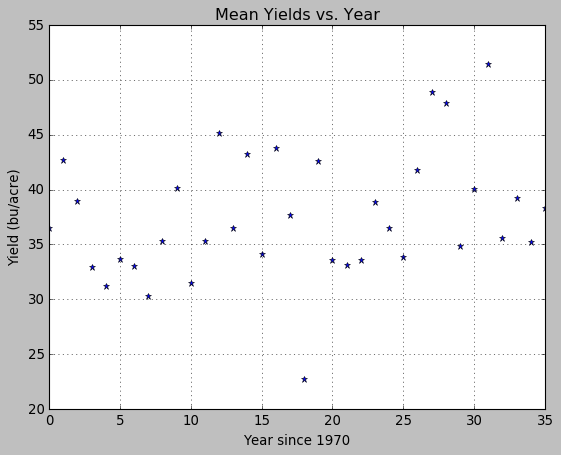

In [94]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(select_ydata_mean,'*')
plt.title("Mean Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()

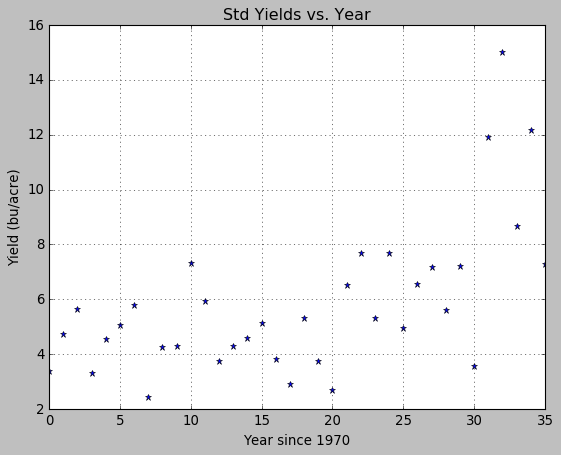

In [95]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(select_ydata_std,'*')
plt.title("Std Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()

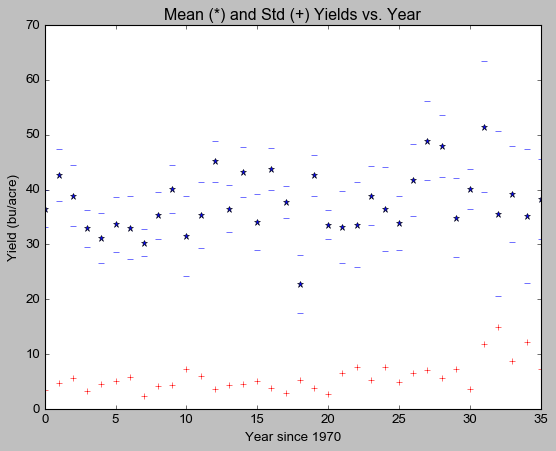

In [96]:
# Show the mean and std on the same axis
upper = select_ydata_mean + select_ydata_std
lower = select_ydata_mean - select_ydata_std
plt.plot(select_ydata_mean,'b*')
plt.plot(select_ydata_std,'r+')
plt.plot(upper,'b_')
plt.plot(lower,'b_')


plt.title("Mean (*) and Std (+) Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.style.use('seaborn-whitegrid')


### Straight Line Fitting via Least Squares ...

<img align="left" src='Data/LS-notes-p1.png' width="300"/>
<img align="left" src='Data/LS-notes-p2.png' width="300"/>

[34.87419026  0.15076623]


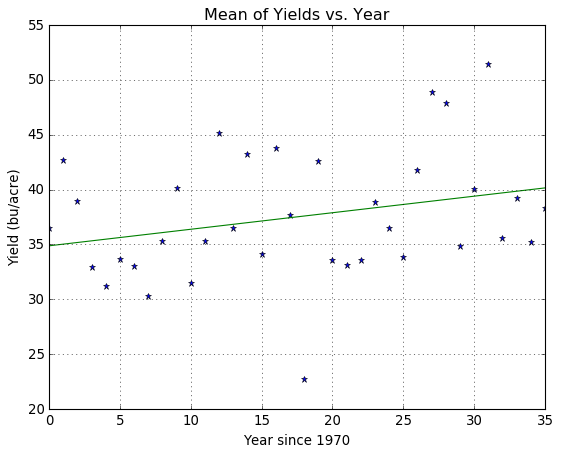

In [97]:
# First lets fit a line to the mean over the state-county pairs of 
# interest and see how that varies over time. The items below 
# correspond directly to the entries in the LS notes above.

y = select_ydata_mean
N = len(y)
x = range(N) # Remember we are using years starting from 0 in 1970
xy = np.multiply(x,y)
xx = np.multiply(x,x)
xsum = sum(x)
ysum = sum(y)
xxsum = sum(xx)
xysum = sum(xy)

A = np.zeros((2,2))
A[0,0] = N
A[0,1] = xsum
A[1,0] = xsum
A[1,1] = xxsum

b = np.zeros(2)
b[0] = ysum
b[1] = xysum

z = np.linalg.solve(A, b)
print(z)

# Now plot the best fit line on top of the data
fig = plt.figure()
plt.style.use('classic')
plt.plot(x,y,'*')
plt.title("Mean of Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()
yy = z[0] + z[1]*x
plt.plot(x,yy)

### Yield Improvement Trend
See that the mean of the yields has increased from about 35 bu/acre in 1970 to a little over 40 bu/acre in 2005. The rate of increase is the slope parameter, which here is found to be about 0.15 bu/acre per year.

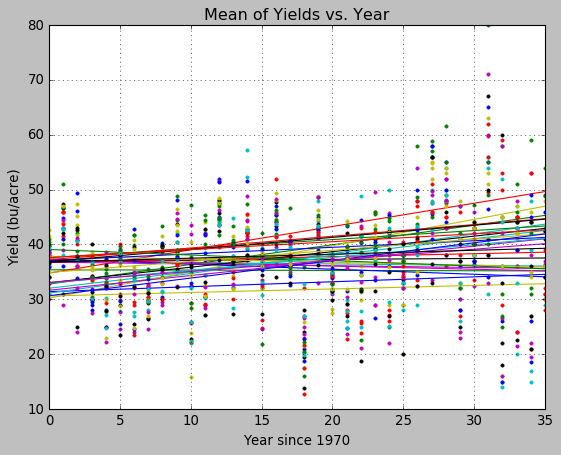

In [98]:
# With a for loop ...
fig = plt.figure()
plt.style.use('classic')
plt.title("Mean of Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()

for k in range(28):
    y = select_ydata[k,:]
    N = len(y)
    x = range(N) # Remember we are years starting from 0
    xy = np.multiply(x,y)
    xx = np.multiply(x,x)
    xsum = sum(x)
    ysum = sum(y)
    xxsum = sum(xx)
    xysum = sum(xy)

    A = np.zeros((2,2))
    A[0,0] = N
    A[0,1] = xsum
    A[1,0] = xsum
    A[1,1] = xxsum

    b = np.zeros(2)
    b[0] = ysum
    b[1] = xysum

    z = np.linalg.solve(A, b)

    # Now plot the best fit line on top of the data
    plt.plot(x,y,'.')
    yy = z[0] + z[1]*x
    plt.plot(x,yy)
    
fig.savefig('SecondPlot.png')

### Least squares residual
It might be interesting to compute the least squares residuals and compare to the variance present in the original data.

In [99]:
# Redo some of the previous calculation to save the LS residuals.
# Could have done this as part of the previous calculation.

R2 = np.zeros(select_ydata.shape[0])

for k in range(select_ydata.shape[0]):

    y = select_ydata[k,:]
    N = len(y)
    x = range(N) # Remember we are years starting from 0
    xy = np.multiply(x,y)
    xx = np.multiply(x,x)
    xsum = sum(x)
    ysum = sum(y)
    xxsum = sum(xx)
    xysum = sum(xy)

    A = np.zeros((2,2))
    A[0,0] = N
    A[0,1] = xsum
    A[1,0] = xsum
    A[1,1] = xxsum

    b = np.zeros(2)
    b[0] = ysum
    b[1] = xysum

    z = np.linalg.solve(A, b)
    
    yy = z[0] + z[1]*x
    error = y - yy
    R2[k] = sum(np.multiply(error,error))



`R2` is a numpy array containing the least-squares residual for each location in our selected set of state-county pairs. If we properly normalize and average we can compare the square root of the average squared error after subtracting mean trends with the original standard deviation. This gives a measure of how well the trend explains the data.

In [100]:
s1 = np.sqrt(np.mean(R2)/(select_ydata.shape[1]))
print('Equivalent STDev after removing trend is {:1.1f} bu/acre.'.format(s1))

Equivalent STDev after removing trend is 8.0 bu/acre.


In [101]:
s2 = np.std(select_ydata)
print('Original STDev is {:1.1f} bu/acre.'.format(s2))

Original STDev is 8.6 bu/acre.


### Summary:
- Clearly the variation in average yields by location and year is significant (over 20% of the mean)
- The trend in yield improvement is mostly swamped by the natural variation
- What do you think this says about the winter wheat farming business?

### Homework: Modify and Simplify This Code for Corn Yields